In [1]:
!pip install functorch

     |████████████████████████████████| 21.4 MB 5.7 MB/s 


In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from functorch import jacrev

In [3]:
xs, ys = np.meshgrid(np.arange(-1,1,0.05), np.arange(-1,1,0.05))
X = np.vstack([xs.ravel(), ys.ravel()]).transpose()
X.shape

(1600, 2)

(-1.0975000000000001,
 1.0475000000000019,
 -1.0975000000000001,
 1.0475000000000019)

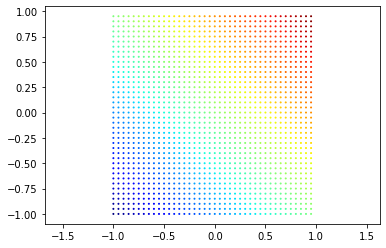

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=1, c=xs+ys, cmap="jet")
plt.axis("equal")

In [5]:
cos60 = np.cos(60/180*np.pi)
sin60 = np.sin(60/180*np.pi)
cos30 = np.cos(30/180*np.pi)
sin30 = np.sin(30/180*np.pi)

In [6]:
# R = torch.tensor([[1, 0], [0, 1]], dtype=torch.float)
R = torch.tensor([[cos30, -sin30], [sin30, cos30]], dtype=torch.float)
R2 = torch.tensor([[cos30, sin30], [-sin30, cos30]], dtype=torch.float)
S = torch.tensor([[1.2, 0], [0, 1.2]], dtype=torch.float)
K = torch.tensor([[1, 0.2], [0, 1]], dtype=torch.float)
R, S, K

(tensor([[ 0.8660, -0.5000],
         [ 0.5000,  0.8660]]), tensor([[1.2000, 0.0000],
         [0.0000, 1.2000]]), tensor([[1.0000, 0.2000],
         [0.0000, 1.0000]]))

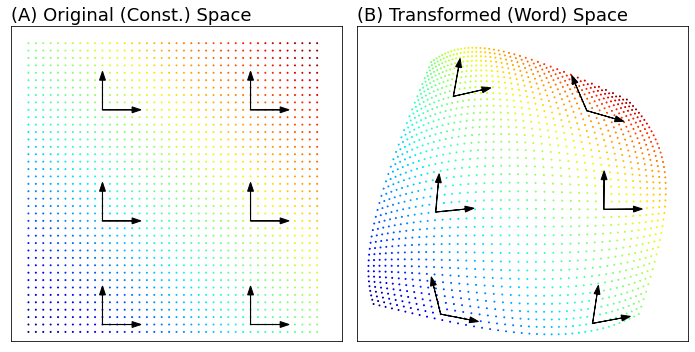

In [16]:
torch.manual_seed(12)
l1 = nn.Linear(2, 2)
l2 = nn.Linear(2, 2)
l1.bias = nn.Parameter(torch.tensor([-0.2,0.3]))
l1.weight = nn.Parameter(R)
l2.bias = nn.Parameter(torch.tensor([0.,-0.3]))
l2.weight = nn.Parameter(R2.matmul(S))
model = nn.Sequential(l1, nn.Tanh(), l2)
Y = model(torch.tensor(X, dtype=torch.float)).detach().numpy()

# compute Jacobians
point_idxs = [50, 70, 610, 630, 1210, 1230]

Jp = []
J_fn = jacrev(model)
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)

CMAP = "jet"
plt.scatter(Y[:, 0], Y[:, 1], s=1, c=xs+ys, cmap=CMAP)
for pidx in point_idxs:
  Jp = J_fn(torch.tensor(X[pidx, :], dtype=torch.float)).detach().numpy()
  Jp = Jp / np.linalg.norm(Jp, axis=0)

  plt.arrow(Y[pidx,0], Y[pidx,1], Jp[0,0]*0.2, Jp[1,0]*0.2, head_width=0.04, color="black")
  plt.arrow(Y[pidx,0], Y[pidx,1], Jp[0,1]*0.2, Jp[1,1]*0.2, head_width=0.04, color="black")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.axis("equal")
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_title("(B) Transformed (Word) Space", fontsize=18, x=0, ha="left")

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=1, c=xs+ys, cmap=CMAP)
for pidx in point_idxs:  
  plt.arrow(X[pidx,0], X[pidx,1], 0.2, 0, head_width=0.04, color="black")
  plt.arrow(X[pidx,0], X[pidx,1], 0, 0.2, head_width=0.04, color="black")
plt.axis("equal")
ax = plt.gca()
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.set_title("(A) Original (Const.) Space", fontsize=18, x=0, ha="left")

fig.tight_layout()
fig.savefig("90.01-Jacobian_visualize.png", dpi=300)

In [ ]:
Jp[0]

array([ 0.9611426, -0.3948187], dtype=float32)

In [ ]:
Jp[0] / np.linalg.norm(Jp[0], axis=0)

array([[ 0.9921132 ,  0.36274946],
       [-0.12534556,  0.9318867 ]], dtype=float32)

In [ ]:
np.linalg.norm(Jp[0], axis=0)

array([0.3698747 , 0.31183574], dtype=float32)

In [ ]:
np.sqrt(0.9921**2 + 0.1253**2)

0.9999812498242154